# EDA-Schema Dataset Analysis

This notebook analyzes sample data from the **EDA-Schema open dataset (version 1.1)**. The dataset is designed as a general resource for analysis and machine learning and is publicly available [here](https://drive.google.com/drive/folders/1B3rBvbnviBrKw1aLRpv7e1pEXSCy_vLQ?usp=sharing). Below are the key details:

### Dataset Specifications:
- **Physical Design Toolset**: OpenROAD  
- **Design PDK**: SkyWater 130 HD  
- **Parameter Setup/Constraints**:  
  - Clock latency: 0.01 ns  
  - Clock input delay: 0.01 ns  
  - Clock output delay: 0.01 ns  
  - Utilization: 30%  
  - Aspect ratio: 1.0  
  - Clock uncertainty (setup/hold): 0.2 ns  

### Dataset Purpose:
The dataset focuses on circuit timing performance under two scenarios:  

1. Barely failing timing (id-000001), with worst slack values designed to stay within the range of **[-0.5 ns, 0 ns]**.  
2. Barely passing timing (id-000002), with worst slack values designed to stay within the range of **[0 ns, 0.5 ns]**.  

This ensures the data is suitable for timing-critical analysis and optimization tasks.

### Timing Summary:

| **Circuit**       | **Target Clock Period (ns)** (Barely Fail: id-000001) | **Worst Slack (ns)** (Barely Fail: id-000001) | **Target Clock Period (ns)** (Barely Pass: id-000002) | **Worst Slack (ns)** (Barely Pass: id-000002) |
|--------------------|-------------------------------------------|-------------------------------------|--------------------------------------------|-------------------------------------|
| **ac97_ctrl**      | 3                                         | -0.1823                             | 3.25                                       | 0.1333                              |
| **aes_core**       | 3.5                                       | -0.1999                             | 3.75                                       | 0.0458                              |
| **des3_area**      | 3.75                                      | -0.0119                             | 4                                          | 0.1823                              |
| **i2c**            | 2.25                                      | -0.1594                             | 2.5                                        | 0.0658                              |
| **mem_ctrl**       | 5                                         | -0.0863                             | 5.25                                       | 0.1420                              |
| **pci**            | 3.75                                      | -0.1326                             | 4                                          | 0.1548                              |
| **sasc**           | 1.75                                      | -0.0992                             | 2                                          | 0.1752                              |
| **simple_spi**     | 2                                         | -0.1452                             | 2.25                                       | 0.1232                              |
| **spi**            | 4.25                                      | -0.1739                             | 4.5                                        | 0.2488                              |
| **ss_pcm**         | 1.625                                     | -0.0144                             | 1.75                                       | 0.1107                              |
| **systemcaes**     | 4.75                                      | -0.1644                             | 5                                          | 0.0050                              |
| **systemcdes**     | 4                                         | -0.0069                             | 4.25                                       | 0.3052                              |
| **tv80**           | 7                                         | -0.0294                             | 7.25                                       | 0.1227                              |
| **usb_funct**      | 2.5                                       | -0.0917                             | 2.75                                       | 0.1018                              |
| **usb_phy**        | 1.75                                      | -0.0449                             | 2                                          | 0.1821                              |
| **wb_dma**         | 3                                         | -0.0746                             | 3.25                                       | 0.0708                              |

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


# Import EDA_schema library functions
from eda_schema.entity import PHASES
from eda_schema.dataset import Dataset
from eda_schema.db import SQLitePickleDB

# Define the dataset directory (adjust the path if needed)
DATASET_DIR = "../dataset/dataset_openroad_sky130hd_iwls05_v1.1"
dataset = Dataset(SQLitePickleDB(DATASET_DIR))

## General Statistics

The general statistics of the dataset provide valuable insights into the diversity and variation among different circuit designs. These statistics showcase differences across various circuit characteristics, such as the number of inputs, outputs, nets, and cells, which collectively contribute to the unique properties of each design.

In [2]:
# --- Data Loading ---
# Extracting and merging key tables from the database
netlist_df = dataset.db.get_table_data("netlists")
cell_metrics_df = dataset.db.get_table_data("cell_metrics")
area_metrics_df = dataset.db.get_table_data("area_metrics")
power_metrics_df = dataset.db.get_table_data("power_metrics")
critical_path_df = dataset.db.get_table_data("critical_path_metrics")

# Combine all the extracted data into a single DataFrame
df = (
    netlist_df
    .merge(cell_metrics_df, on=["circuit", "netlist_id", "phase"], how="inner")
    .merge(area_metrics_df, on=["circuit", "netlist_id", "phase"], how="inner")
    .merge(power_metrics_df, on=["circuit", "netlist_id", "phase"], how="inner")
    .merge(critical_path_df, on=["circuit", "netlist_id", "phase"], how="inner")
)

# Convert phase column to categorical for ordered operations
df['phase'] = df['phase'].astype(pd.CategoricalDtype(PHASES, ordered=True))

# Select columns for analysis
columns = ["circuit", "netlist_id", "no_of_inputs", "no_of_outputs", "no_of_nets", "no_of_cells", "no_of_sequential_cells", "no_of_buffers", "no_of_inverters"]
summary_df = df[df.phase=="detailed_route"][columns]
summary_df

circuit netlist_id  no_of_inputs  no_of_outputs  no_of_nets  \
5     ac97_ctrl  id-000001          84.0           48.0      6664.0   
11    ac97_ctrl  id-000002          84.0           48.0      6660.0   
17     aes_core  id-000001         259.0          129.0     13751.0   
23     aes_core  id-000002         259.0          129.0     13529.0   
29    des3_area  id-000001         240.0           64.0      3889.0   
35    des3_area  id-000002         240.0           64.0      3884.0   
41          i2c  id-000001          19.0           14.0       728.0   
47          i2c  id-000002          19.0           14.0       717.0   
53     mem_ctrl  id-000001         115.0          152.0      6148.0   
59     mem_ctrl  id-000002         115.0          152.0      6120.0   
65          pci  id-000001         162.0          207.0     14112.0   
71          pci  id-000002         162.0          207.0     14045.0   
77         sasc  id-000001          16.0           12.0       448.0   
83         sasc  id-000002          16.0           12.0       448.0   
89   simple_spi  id-000001          16.0           12.0       562.0   
95   simple_spi  id-000002          16.0           12.0       560.0   
101         spi  id-000001          47.0           45.0      1864.0   
107         spi  id-000002          47.0           45.0      1890.0   
113      ss_pcm  id-000001          19.0            9.0       355.0   
119      ss_pcm  id-000002          19.0            9.0       355.0   
125  systemcaes  id-000001         260.0          129.0      5782.0   
131  systemcaes  id-000002         260.0          129.0      5765.0   
137  systemcdes  id-000001         132.0           65.0      1890.0   
143  systemcdes  id-000002         132.0           65.0      1888.0   
149        tv80  id-000001          14.0           32.0      4639.0   
155        tv80  id-000002          14.0           32.0      4686.0   
161   usb_funct  id-000001         128.0          121.0     10098.0   
167   usb_funct  id-000002         128.0          121.0     10101.0   
173     usb_phy  id-000001          15.0           18.0       415.0   
179     usb_phy  id-000002          15.0           18.0       406.0   
185      wb_dma  id-000001         217.0          215.0      2962.0   
191      wb_dma  id-000002         217.0          215.0      2976.0   

     no_of_cells  no_of_sequential_cells  no_of_buffers  no_of_inverters  
5        36961.0                  2211.0          478.0             84.0  
11       37048.0                  2211.0          473.0             84.0  
17       63102.0                   562.0         1889.0            139.0  
23       63244.0                   562.0         1743.0            134.0  
29       14980.0                    64.0         1106.0             45.0  
35       14889.0                    64.0         1104.0             45.0  
41        4572.0                   129.0           95.0             16.0  
47        2990.0                   129.0           82.0             16.0  
53       35988.0                  1051.0          936.0             76.0  
59       35985.0                  1051.0          903.0             76.0  
65       91245.0                  3220.0         1207.0             94.0  
71       91221.0                  3220.0         1176.0             95.0  
77        3210.0                   118.0           72.0             20.0  
83        2169.0                   118.0           70.0             20.0  
89        2638.0                   131.0           71.0             23.0  
95        3881.0                   131.0           72.0             23.0  
101      10867.0                   229.0          254.0             40.0  
107      10935.0                   229.0          273.0             39.0  
113       2364.0                    87.0           53.0              0.0  
119       2366.0                    87.0           53.0              0.0  
125      22132.0                   670.0          977.0             45.0  
131      21969

---
## Power, Performance, Area Analysis

Analyze and visualize PPA metrics to understand design trade-offs. The dataset captures variations in power, performance, and area across circuits, highlighting opportunities for optimization and offering insights into efficient design practices.

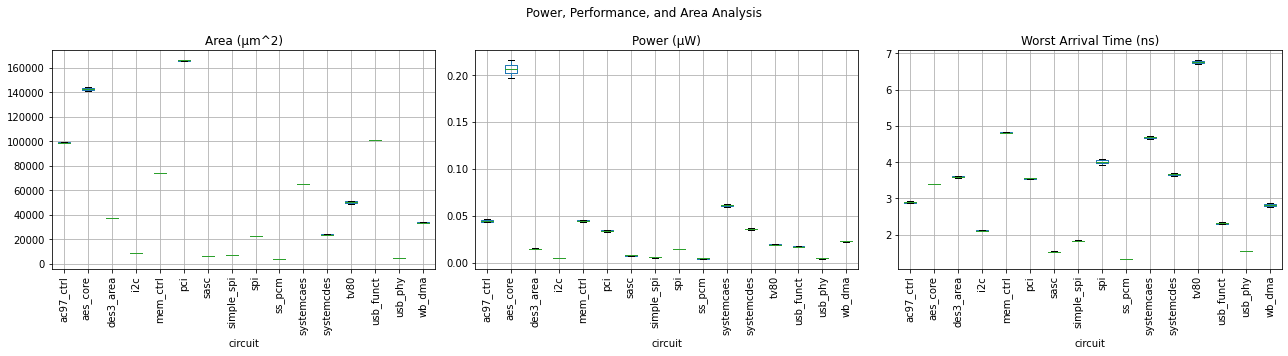

In [3]:
# Plot the distribution of total area, power, and timing metrics.
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
columns = ["total_area", "total_power", "worst_arrival_time"]
xlabels = ["Area (µm^2)", "Power (µW)", "Worst Arrival Time (ns)"]

for i, col in enumerate(columns):
    df[df.phase == "detailed_route"].boxplot(column=[col], by='circuit', ax=axes[i])
    axes[i].yaxis.get_major_formatter().set_scientific(False)
    axes[i].set_title(xlabels[i])
    for label in axes[i].get_xticklabels():
        label.set_rotation(90)

plt.suptitle('Power, Performance, and Area Analysis')
plt.tight_layout()
plt.show()

---
## Timing Analysis

The timing path analysis identifies critical paths and slack violations across circuits. By evaluating worst slack and violated paths under barely passing (0 to 0.5 ns) and barely failing (-0.5 to 0 ns) scenarios, the dataset highlights timing-critical aspects.

No. of timing paths  No. of violated timing paths  \
circuit    netlist_id                                                      
ac97_ctrl  id-000001                 11507                             4   
           id-000002                 11507                             0   
aes_core   id-000001                  3455                           105   
           id-000002                  3455                             0   
des3_area  id-000001                   640                             3   
           id-000002                   640                             0   
i2c        id-000001                   833                           301   
           id-000002                   833                             0   
mem_ctrl   id-000001                  6460                            26   
           id-000002                  6460                             0   
pci        id-000001                 17684                           210   
           id-000002                 17684                             0   
sasc       id-000001                   662                           174   
           id-000002                   662                             0   
simple_spi id-000001                   739                            61   
           id-000002                   739                             0   
spi        id-000001                  1599                          1370   
           id-000002                  1599                             0   
ss_pcm     id-000001                   480                             2   
           id-000002                   480                             0   
systemcaes id-000001                  4665                          1510   
           id-000002                  4665                             0   
systemcdes id-000001                  1465                             2   
           id-000002                  1465                             0   
tv80       id-000001                  1965                            32   
           id-000002                  1965                             0   
usb_funct  id-000001                  6103                            18   
           id-000002                  6037                             0   
usb_phy    id-000001                   630                             5   
           id-000002                   630                             0   
wb_dma     id-000001                  3774                            12   
           id-000002                  3774                             0   

                       Worst Slack (ns)    TNS (ns)  
circuit    netlist_id                                
ac97_ctrl  id-000001          -0.182309   -0.667137  
           id-000002           0.133329    0.000000  
aes_core   id-000001          -0.199885   -4.713289  
           id-000002           0.045823    0.000000  
des3_area  id-000001          -0.011935   -0.015964  
           id-000002           0.182252    0.000000  
i2c        id-000001          -0.159418  -14.961850  
           id-000002           0.065763    0.000000  
mem_ctrl   id-000001          -0.086298   -0.555081  
           id-000002           0.141991    0.000000  
pci        id-000001          -0.132643  -10.400303  
           id-000002           0.154832    0.000000  
sasc       id-000001          -0.099185   -8.564089  
           id-000002           0.175233    0.000000  
simple_spi id-000001          -0.145162   -2.364093  
           id-000002           0.123199    0.000000  
spi        id-000001          -0.173942 -126.546592  
           id-000002           0.248844    0.000000  
ss_pcm     id-000001          -0.014350   -0.028701  
           id-000002           0.110650    0.000000  
systemcaes id-000001          -0.164417  -57.565371  
           id-000002           0.005043    0.000000  
systemcdes id-000001          -0.006915   -0.009631  
           id-000002           0.305235    0.000000  
tv80       id-000001          -0.0

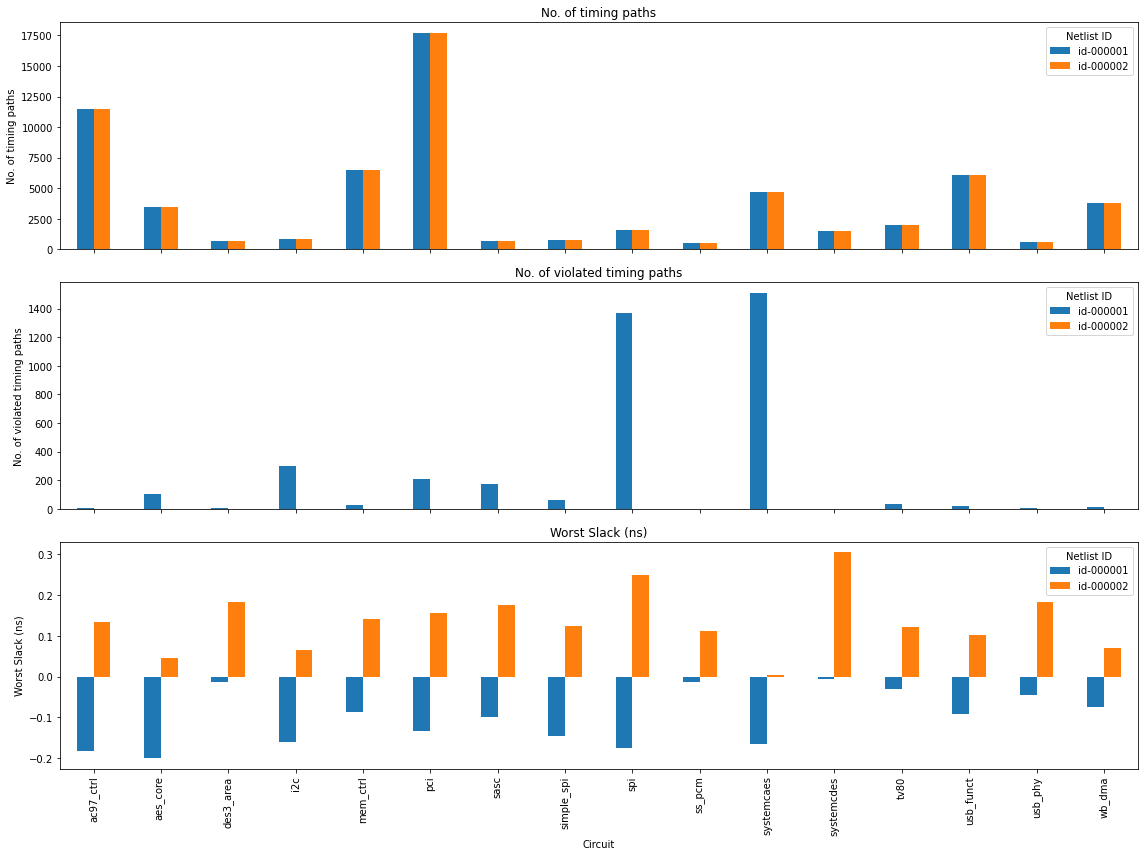

In [4]:
def get_min_slack(group):
    return group.loc[group['slack'].idxmin()]

timing_path_df = dataset.db.get_table_data("timing_paths", phase="detailed_route", path_type="max")
slack_df = timing_path_df.groupby(["circuit", "netlist_id"]).apply(get_min_slack)

# Add summary metrics for visualization
timing_path_summary_df = pd.DataFrame(index=slack_df.index)
timing_path_summary_df["No. of timing paths"] = timing_path_df.groupby(["circuit", "netlist_id"]).size()
timing_path_summary_df["No. of violated timing paths"] = timing_path_df[timing_path_df.slack < 0].groupby(["circuit", "netlist_id"]).size()
timing_path_summary_df["Worst Slack (ns)"] = slack_df["slack"]
timing_path_summary_df["TNS (ns)"] = timing_path_df[timing_path_df.slack<0].groupby(["circuit", "netlist_id"]).sum().slack
timing_path_summary_df.fillna(0, inplace=True)
timing_path_summary_df["No. of violated timing paths"] = timing_path_summary_df["No. of violated timing paths"].astype(int)

display(timing_path_summary_df)

# Plot timing analysis metrics
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)
metrics = ["No. of timing paths", "No. of violated timing paths", "Worst Slack (ns)"]

for ax, metric in zip(axes.flatten(), metrics):
    timing_path_summary_df[metric].unstack().plot(kind="bar", ax=ax, title=metric)
    ax.set_ylabel(metric)
    ax.set_xlabel("Circuit")
    ax.legend(title="Netlist ID")

plt.tight_layout()
plt.show()

---
## Inter-Phase Analysis

Analyze and visualize inter-phase trends for metrics like area, power, arrival time, and worst slack. 
This analysis highlights how these metrics evolve across different design stages (phases).

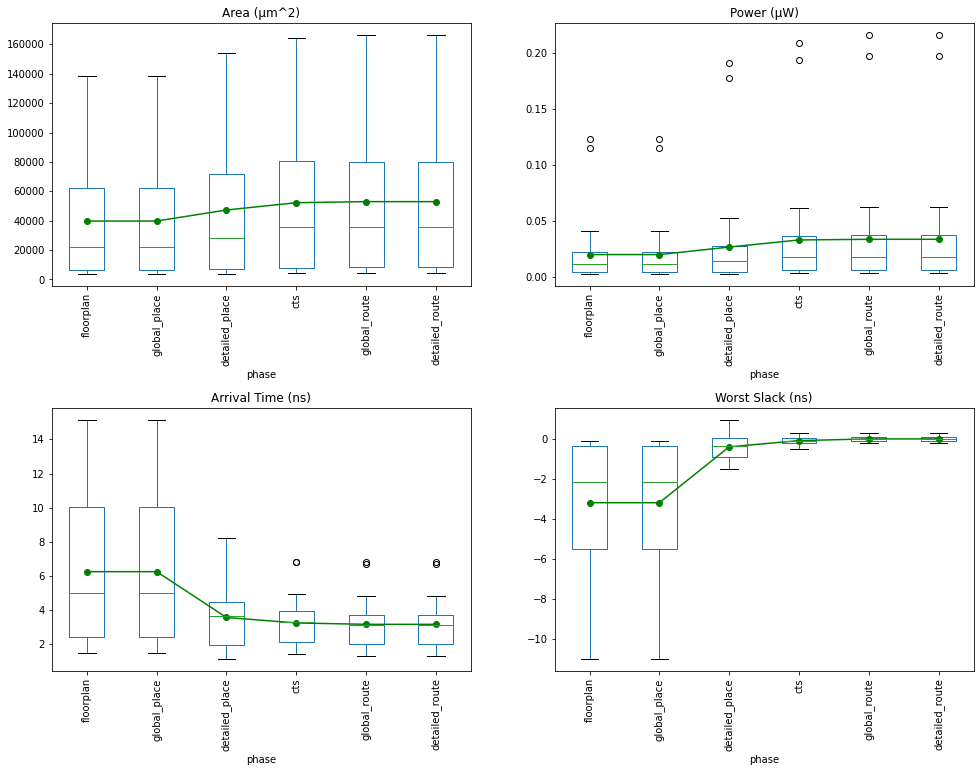

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
fig.tight_layout(pad=10)

columns = ["total_area", "total_power", "worst_arrival_time", "worst_slack"]
xlabels = ["Area (µm^2)", "Power (µW)", "Arrival Time (ns)", "Worst Slack (ns)"]

for i, metric in enumerate(columns):
    df.boxplot(column=[metric], by="phase", grid=False, ax=axes[i], showfliers=True)
    means = df.groupby("phase")[metric].mean()
    x_positions = list(range(1, len(means) + 1))
    axes[i].plot(x_positions, means, marker='o', color='green')
    axes[i].set_title(xlabels[i])
    for label in axes[i].get_xticklabels():
        label.set_rotation(90)

fig.suptitle('')
plt.show()